I imported the Python packages I will need to view the graphs.

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

I loaded the dataset of police incidents reported in the last 30 days. I then showed the first 5 attributes.

In [5]:
df = pd.read_csv("police_incident_data.csv")
df = df.dropna()
df.head(5)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,265584996,21204292,27,2021-11-09T11:33:00,"10 Block S 18th St & Pius St Pittsburgh, PA 15203",N,South Side Slopes,3,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1706.0,3.0,3.0,-79.981049,40.425811
1,265586753,21204310,27,2021-11-09T06:00:00,"2800 Block Kenilworth St Pittsburgh, PA 15226",N,Brookline,6,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1919.0,4.0,5.0,-80.026570,40.396203
3,264649891,21196425,11,2021-10-27T11:16:00,"100 Block Abner Ave Pittsburgh, PA 15210",N,Bon Air,3,CREDIT CARDS,4106 Access Device Fraud / 7615(a)(3) Computer...,1806.0,4.0,5.0,-79.998251,40.408592
4,264654565,21196451,11,2021-10-27T11:59:00,"5700 Block Dellaglen Ave Pittsburgh, PA 15207",N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.919864,40.366543
5,-3270901116,21202584,27,2021-11-06T10:19:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Central Business District,2,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,201.0,6.0,6.0,-79.996041,40.435040


In [6]:
query_mask3 = df['INCIDENTNEIGHBORHOOD'] == "Mount Oliver"
df.loc[query_mask3] = "Mount Oliver Borough"

I ordered the neighborhoods by how many incidents they have had from greatest to least.

In [7]:
df["INCIDENTNEIGHBORHOOD"].value_counts()

Central Business District    170
South Side Flats             149
Carrick                       96
East Liberty                  90
Mount Washington              81
                            ... 
Hays                           2
Outside City                   1
New Homestead                  1
Chartiers City                 1
Summer Hill                    1
Name: INCIDENTNEIGHBORHOOD, Length: 90, dtype: int64

In [10]:
safe_neighborhoods = pd.DataFrame((df["INCIDENTNEIGHBORHOOD"].value_counts()))
safe_neighborhoods

,INCIDENTNEIGHBORHOOD
Central Business District,170
South Side Flats,149
Carrick,96
East Liberty,90
Mount Washington,81
...,...
Hays,2
Outside City,1
New Homestead,1
Chartiers City,1


I plotted the neighborhoods to show that there is not much difference between the bottom 10 as they are all relatively safe compared to the rest of the neighborhoods.

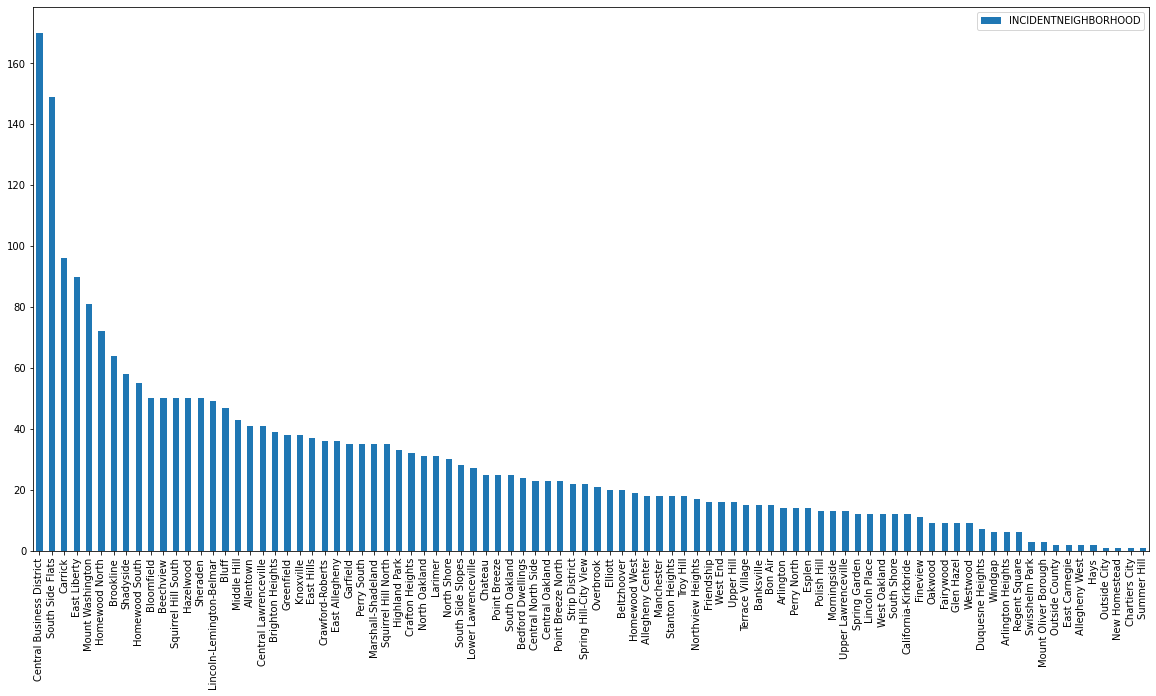

In [11]:
safe_neighborhoods.plot.bar(figsize = (20,10))

I loaded the map of Pittsburgh.

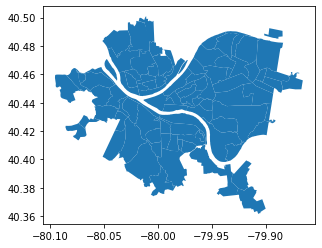

In [13]:
neighborhoods = geopandas.read_file("Neighborhoods_new/neighborhoods_new.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

I put all of the neighborhoods in a data frame.

In [14]:
value = df["INCIDENTNEIGHBORHOOD"].value_counts()
value = pd.DataFrame(value)
value

,INCIDENTNEIGHBORHOOD
Central Business District,170
South Side Flats,149
Carrick,96
East Liberty,90
Mount Washington,81
...,...
Hays,2
Outside City,1
New Homestead,1
Chartiers City,1


I start syncing the data up with the map of Pittsburgh.

In [15]:
incidents_map = neighborhoods.merge(value, how='left', left_on='hood', right_on=value.index)
# look at the head to confirm it merged correctly
incidents_map[['hood','INCIDENTNEIGHBORHOOD','geometry']].head()

,hood,INCIDENTNEIGHBORHOOD,geometry
0,Mount Oliver Borough,3.0,"MULTIPOLYGON (((-79.98819 40.41852, -79.98819 ..."
1,Central Oakland,23.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
2,North Oakland,31.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
3,West Oakland,12.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
4,Crawford-Roberts,36.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."


I color code the map of Pittsburgh so the darker areas have more incidents. As you can see, there are many neighborhoods that have little to no incidents. Pairing this data with the data of my partners, I came to the conclusion that Mount Oliver is the safest since it is the best for their data sets and it is in the top 10 for mine.

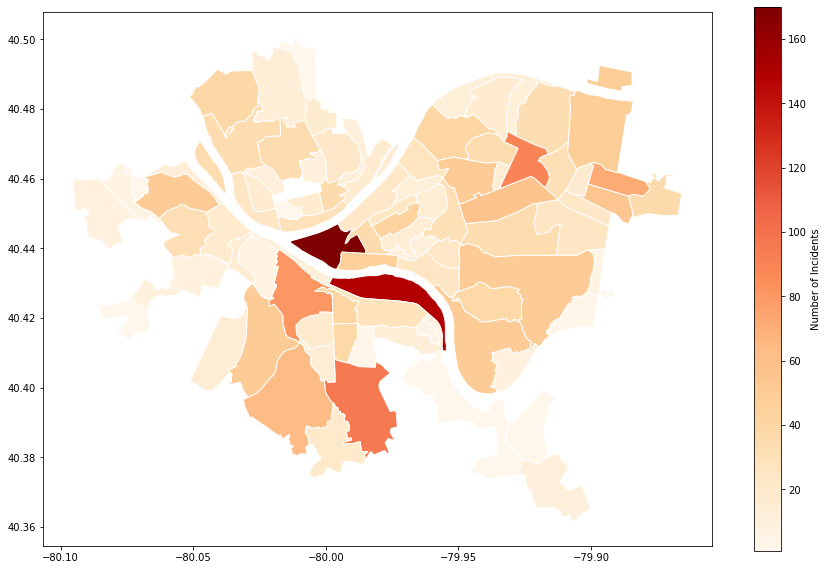

In [17]:
incidents_map.plot(column='INCIDENTNEIGHBORHOOD', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               )